# 5 Modeling<a id='5_Modeling'></a>

## 5.1 Contents<a id='5.1_Contents'></a>
* [5 Modeling](#5_Modeling)
  * [5.1 Contents](#5.1_Contents)
  * [5.2 Introduction](#5.2_Introduction)
  * [5.3 Imports](#5.3_Imports)
  * [5.4 Load Data](#5.4_Load_Data)
  * [5.5 Train/Test Split](#5.5_Train/Test_Split)
  * [5.6 Initial Not-Even-A-Model](#5.6_Base_Model)
  * [5.7 Initial Models](#5.7_Initial_Models)
    * [5.7.1 Naive Baye's Classifier](#5.7.1_Naive_Bayes)
    * [5.7.2 KNN Model](#5.7.2_KNN)
    * [5.7.3 Random Forest Model](#5.7.3_Random_Forest)
    * [5.7.4 AdaBoost Model](#5.7.4_Adaboost)
    * [5.7.5 Logisitic Regression Model](#5.7.5_Logistic_Regression)
    * [5.7.6 SVC Model](#5.7.6_SVM)
  * [5.8 Summary](#5.8_Summary)

## 5.2 Introduction<a id='5.2_Introduction'></a>

With the training and test data all set, we will try out classifying our dataset across multiple classifiers.

Out intention is to classify a perfume as _women_, _men_ or _unisex_ based on the notes in the perfume.

We have accounted for 299 most frequent notes in perfumes. Let's see how the classificaiton works.

## 5.3 Imports<a id='5.3_Imports'></a>

In [48]:
import pandas as pd
import numpy as np
import os
import pickle
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectKBest, f_regression

## 5.4 Load Data<a id='5.4_Load_Data'></a>

In [49]:
train_data = pd.read_csv('../data/processed/train.csv')
df = train_data.copy()
df.head()

,musk,jasmine,amber,patchouli,rose,vanilla,cedar,bergamot,vetiver,tonka_bean,...,pink_peony,sea_salt,fennel,white_lily,clover,tomato_leaf,rice,red_rose,other_notes,label
0,0,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
1,0,0,0,0,9,0,16,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,16,9,0,0,25,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,2
3,16,9,0,0,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16,0,0,0,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
X = df.drop(columns='label')
y = df['label']

In [51]:
test_data = pd.read_csv('../data/processed/test.csv')
test_data

,musk,jasmine,amber,patchouli,rose,vanilla,cedar,bergamot,vetiver,tonka_bean,...,pink_peony,sea_salt,fennel,white_lily,clover,tomato_leaf,rice,red_rose,other_notes,label
0,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,16,0,0,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,16,0,16,16,9,0,16,0,16,0,...,0,0,0,0,0,0,0,0,0,0
4,0,9,0,16,9,16,0,0,16,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11909,0,0,16,16,0,0,16,0,16,0,...,0,4,0,0,0,0,0,0,0,1
11910,0,0,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,1
11911,16,0,16,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
X_test = test_data.drop(columns='label')
y_test = test_data['label']

## 5.5 Transform Data <a id='5.5_Transform_Data'></a>

In [53]:
# features_pca = PCA().fit(X)
# print(features_pca)

In [54]:
# features_pca.explained_variance_ratio_.cumsum()[0:100]

In [55]:
# plt.subplots(figsize=(10, 6))
# plt.plot(features_pca.explained_variance_ratio_.cumsum())
# plt.xlabel('Component #')
# plt.ylabel('Cumulative ratio variance')
# plt.title('Cumulative variance ratio explained by PCA components for notes in a perfume');

In [56]:
# features_pca_x = features_pca.transform(X)

In [57]:
# features_pca_x.shape

Let's pick up only the top 100 PCA columns.

In [58]:
#X_pca = pd.DataFrame(features_pca_x[:,:100])

In [59]:
#X_pca.shape

In [60]:
#X_pca.head()

In [61]:
# Transform the Test Dataset too
#X_test_pca = pd.DataFrame(features_pca.transform(X_test)[:,:100])

In [62]:
#X_pca.shape, X_test_pca.shape

Which features play the most important role?

In [63]:
# loadings = pd.DataFrame(features_pca.components_.T, index=df.columns[0:-1])
# loadings

We cannot find a specific field. All of them contribute one way or the other in this.

## 5.6 Initial Not-Even-A-Model<a id='5.6_Base_Model'></a>

Attempting a DummyClassifier to determine a baseline accuracy value.

In [64]:
# strategies = ['most_frequent', 'stratified', 'uniform', 'constant'] 

dummy_model = DummyClassifier(strategy='most_frequent', random_state=0)
dummy_model.fit(X, y)
dummy_model.score(X_test, y_test)

0.5004616805170822

Just predicting the classification as _female_ for all cases gives us a *50% accuracy*.

## 5.7 Initial Models<a id='5.7_Initial_Models'></a>

### 5.7.1 Naive Baye's Classifier<a id='5.7.1_Naive_Bayes'></a>

As almost all of the fields are of binary nature, let's attempt Naive Baye's Classifier using the original data - non-transformed data.

In [65]:
naive_model = BernoulliNB(alpha=1)
test_scores = cross_val_score(naive_model, X, y, cv=5)
test_scores

array([0.57484611, 0.58080313, 0.58709948, 0.58220232, 0.59073737])

The scores are consistent across the folds, hence we can assume there is no overfitting happening.

In [66]:
# fit the model and get predictions
naive_model.fit(X, y)
y_pred = naive_model.predict(X_test)

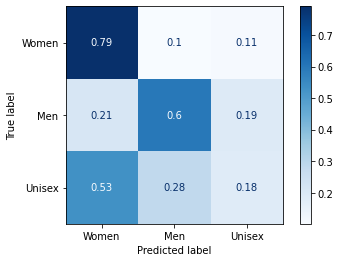

In [67]:
plot_confusion_matrix(naive_model, X_test, y_test, display_labels=['Women', 'Men', 'Unisex'], cmap='Blues', normalize='true')
plt.show();

Evaluate the classifcation report.

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73      5962
           1       0.52      0.60      0.56      2770
           2       0.33      0.18      0.24      3181

    accuracy                           0.58     11913
   macro avg       0.51      0.52      0.51     11913
weighted avg       0.55      0.58      0.56     11913



This model performs better classifying the female perfumes than the male perfumes.

### 5.7.2 KNN Model<a id='5.7.2_KNN'></a>

In [69]:
#commenting this out as it takes too long to run. We have run this and got 5 as the best_param
# param_grid = {'n_neighbors': np.arange(1, 15)}

# knn_model = KNeighborsClassifier() 
# knn_cv = GridSearchCV(knn_model, param_grid, cv=5)
# knn_cv.fit(X_pca, y)
# knn_cv.best_params_

In [70]:
best_knn_model = KNeighborsClassifier(n_neighbors=5)
# test_scores = cross_val_score(best_knn_model, X, y, cv=5)
# test_scores

In [71]:
best_knn_model.fit(X, y)
knn_y_pred = best_knn_model.predict(X_test)

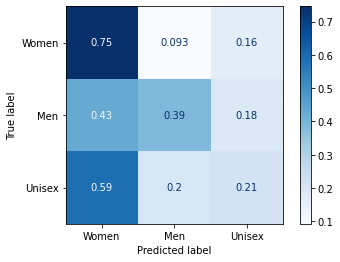

In [72]:
plot_confusion_matrix(best_knn_model, X_test, y_test, display_labels=['Women', 'Men', 'Unisex'], cmap='Blues', normalize='true')
plt.show();

In [73]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.59      0.75      0.66      5962
           1       0.47      0.39      0.43      2770
           2       0.31      0.21      0.25      3181

    accuracy                           0.52     11913
   macro avg       0.46      0.45      0.45     11913
weighted avg       0.49      0.52      0.50     11913



### 5.7.3 Random Forest Model<a id='5.7.3_Random_Forest'></a>

In [74]:
# commenting this out as it takes too long to run. We have run this and got 100 as the best_param

# n_est = [int(n) for n in np.logspace(start=2, stop=3, num=10)]

# param_grid = {'n_estimators': n_est}

# rf_model = RandomForestClassifier()
# rf_cv = GridSearchCV(rf_model, param_grid, cv=5)
# rf_cv.fit(X_train, y_train)
# rf_cv.best_params_

In [75]:
best_rf_model = RandomForestClassifier(n_estimators=100)
# test_scores = cross_val_score(best_rf_model, X, y, cv=10)
# test_scores

In [76]:
best_rf_model.fit(X, y)
rf_y_pred = best_rf_model.predict(X_test)

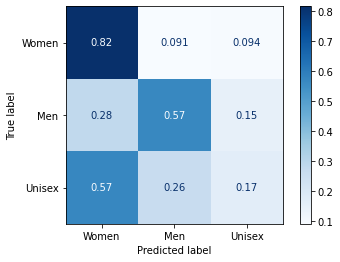

In [77]:
plot_confusion_matrix(best_rf_model, X_test, y_test, display_labels=['Women', 'Men', 'Unisex'], cmap='Blues', normalize='true')
plt.show();

In [78]:
# 100 estimators
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.65      0.82      0.72      5962
           1       0.53      0.57      0.55      2770
           2       0.35      0.17      0.22      3181

    accuracy                           0.58     11913
   macro avg       0.51      0.52      0.50     11913
weighted avg       0.54      0.58      0.55     11913



In [81]:
# Feature importance
feature_importances = pd.DataFrame(best_rf_model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(20)

,importance
other_notes,0.033385
musk,0.024402
rose,0.020235
amber,0.019520
cedar,0.018661
lavender,0.018587
patchouli,0.017771
vanilla,0.016819
jasmine,0.016803
orange,0.016589


### 5.7.4 AdaBoost Model<a id='5.7.4_Adaboost'></a>

In [33]:
# commenting this out as it takes too long to run. We have run this and got 100 as the best_param

# n_est = [int(n) for n in np.logspace(start=1, stop=2, num=10)]

# param_grid = {'n_estimators': n_est}

# ab_model = AdaBoostClassifier(n_estimators=100)
# ab_cv = GridSearchCV(rf_model, param_grid, cv=5)
# ab_cv.fit(X_train, y_train)
# ab_cv.best_params_

In [34]:
best_ab_model = AdaBoostClassifier(n_estimators=100)
# test_scores = cross_val_score(best_ab_model, X_pca, y, cv=10)
# test_scores

In [35]:
best_ab_model.fit(X, y)
rf_y_pred = best_ab_model.predict(X_test)

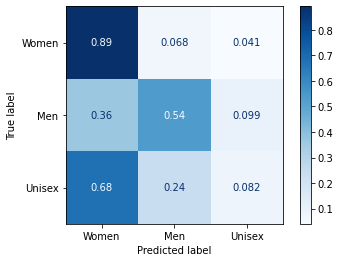

In [36]:
plot_confusion_matrix(best_ab_model, X_test, y_test, display_labels=['Women', 'Men', 'Unisex'], cmap='Blues', normalize='true')
plt.show();

In [37]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.63      0.89      0.74      5962
           1       0.56      0.54      0.55      2770
           2       0.33      0.08      0.13      3181

    accuracy                           0.59     11913
   macro avg       0.51      0.50      0.47     11913
weighted avg       0.53      0.59      0.53     11913



### 5.7.5 Logisitic Regression Model<a id='5.7.5_Logistic_Regression'></a>

In [38]:
best_lr_model = LogisticRegression(random_state=0)
# test_scores = cross_val_score(best_lr_model, X_pca, y, cv=10)
# test_scores

In [39]:
best_lr_model.fit(X, y)
lr_y_pred = best_lr_model.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


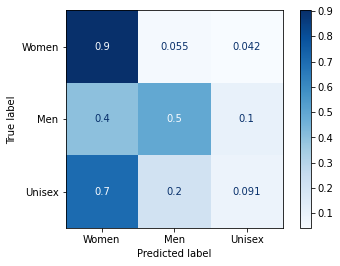

In [40]:
plot_confusion_matrix(best_lr_model, X_test, y_test, display_labels=['Women', 'Men', 'Unisex'], cmap='Blues', normalize='true')
plt.show();

In [41]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.62      0.90      0.73      5962
           1       0.58      0.50      0.54      2770
           2       0.35      0.09      0.14      3181

    accuracy                           0.59     11913
   macro avg       0.52      0.50      0.47     11913
weighted avg       0.54      0.59      0.53     11913



### 5.7.6 SVC Model<a id='5.7.6_SVM'></a>

In [42]:
best_sv_model = SVC()
# test_scores = cross_val_score(best_sv_model, X_pca, y, cv=10)
# test_scores

In [43]:
best_sv_model.fit(X, y)
sv_y_pred = best_sv_model.predict(X_test)

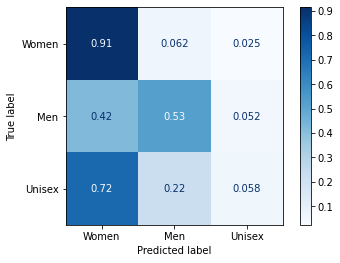

In [44]:
plot_confusion_matrix(best_sv_model, X_test, y_test, display_labels=['Women', 'Men', 'Unisex'], cmap='Blues', normalize='true')
plt.show();

In [45]:
print(classification_report(y_test, sv_y_pred))

              precision    recall  f1-score   support

           0       0.61      0.91      0.73      5962
           1       0.58      0.53      0.55      2770
           2       0.39      0.06      0.10      3181

    accuracy                           0.60     11913
   macro avg       0.53      0.50      0.46     11913
weighted avg       0.54      0.60      0.52     11913



## 5.8 Summary<a id='5.8_Summary'></a>

All the models tried so far have given very low accuracy rate. Hence there is no use implementing them further.

Here is a rundown of all models and their accuracies.

- Naive Baye's            0.58
- KNN Neighbors           0.52
- Random Forest           0.58
- AdaBoost                0.59
- Logistic Regression     0.59
- SVC Model               0.60

THe best model out of all is the SVC model with a 60% accuracy.